In [1]:
!pip install pandas

In [6]:
import pandas as pd
df = pd.read_csv('Concussion Injuries 2012-2014.csv')
df.head()


,ID,Player,Team,Game,Date,Opposing Team,Position,Pre-Season Injury?,Winning Team?,Week of Injury,Season,Weeks Injured,Games Missed,Unknown Injury?,Reported Injury Type,Total Snaps,Play Time After Injury,Average Playtime Before Injury
0,Aldrick Robinson - Washington Redskins vs. Tam...,Aldrick Robinson,Washington Redskins,Washington Redskins vs. Tampa Bay Buccaneers (...,30/09/2012,Tampa Bay Buccaneers,Wide Receiver,No,Yes,4,2012/2013,1,1.0,No,Head,0,14 downs,37.00 downs
1,D.J. Fluker - Tennessee Titans vs. San Diego C...,D.J. Fluker,San Diego Chargers,Tennessee Titans vs. San Diego Chargers (22/9/...,22/09/2013,Tennessee Titans,Offensive Tackle,No,No,3,2013/2014,1,1.0,No,Concussion,0,78 downs,73.50 downs
2,Marquise Goodwin - Houston Texans vs. Buffalo ...,Marquise Goodwin,Buffalo Bills,Houston Texans vs. Buffalo Bills (28/9/2014),28/09/2014,Houston Texans,Wide Receiver,No,No,4,2014/2015,1,1.0,No,Concussion,0,25 downs,17.50 downs
3,Bryan Stork - New England Patriots vs. Buffalo...,Bryan Stork,New England Patriots,New England Patriots vs. Buffalo Bills (12/10/...,12/10/2014,Buffalo Bills,Center,No,Yes,6,2014/2015,1,1.0,No,Head,0,82 downs,41.50 downs
4,Lorenzo Booker - Chicago Bears vs. Indianapoli...,Lorenzo Booker,Chicago Bears,Chicago Bears vs. Indianapolis Colts (9/9/2012),9/09/2012,Indianapolis Colts,Running Back,Yes,Yes,1,2012/2013,0,NaN,No,Head,0,Did not return from injury,NaN


/tmp/ipython-input-7-3980988447.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_injuries.index, x=top_injuries.values, palette='Set2')


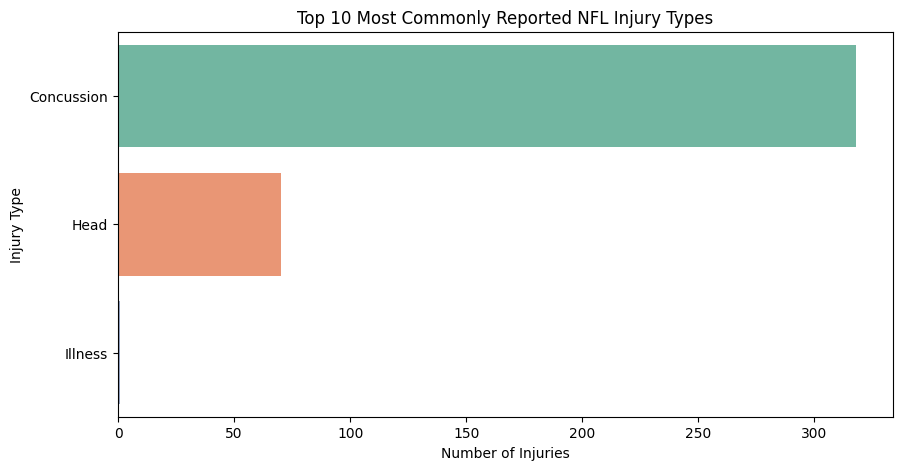

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 most common injuries
top_injuries = df['Reported Injury Type'].value_counts().head(10)

# Create bar plot
plt.figure(figsize=(10, 5))
sns.barplot(y=top_injuries.index, x=top_injuries.values, palette='Set2')
plt.title('Top 10 Most Commonly Reported NFL Injury Types')
plt.xlabel('Number of Injuries')
plt.ylabel('Injury Type')
plt.show()


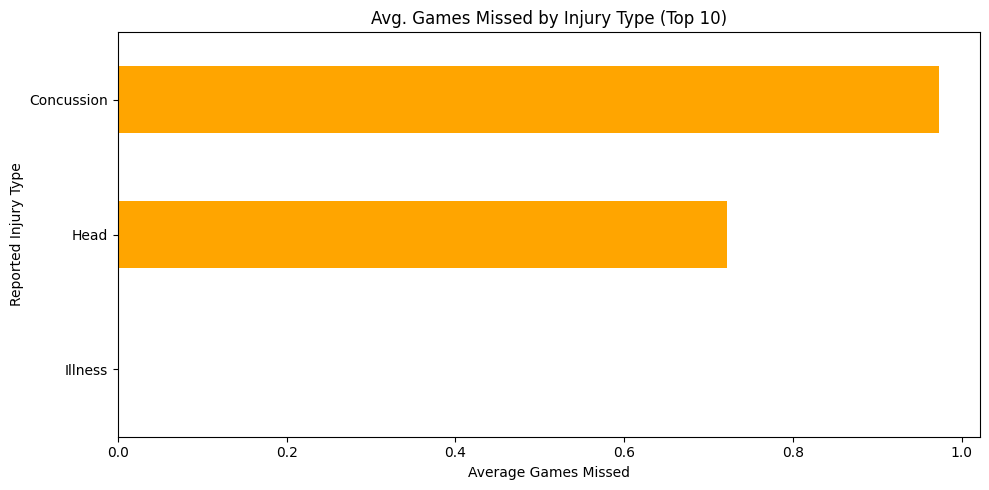

In [ ]:
avg_games_missed = df.groupby('Reported Injury Type')['Games Missed'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
avg_games_missed.plot(kind='barh', color='orange')
plt.title('Avg. Games Missed by Injury Type (Top 10)')
plt.xlabel('Average Games Missed')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


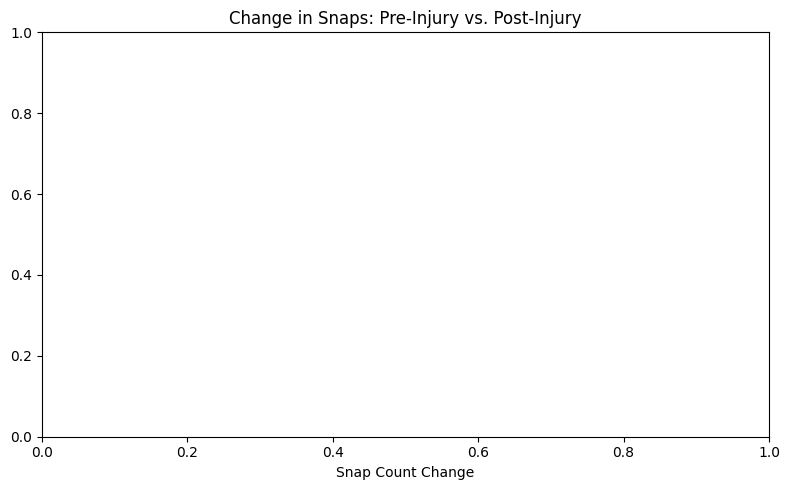

In [ ]:
df['Snap Delta'] = df['Play Time After Injury'] - df['Average Playtime Before Injury']


plt.figure(figsize=(8,5))
sns.histplot(df['Snap Delta'].dropna(), kde=True, bins=30, color='red')
plt.title('Change in Snaps: Pre-Injury vs. Post-Injury')
plt.xlabel('Snap Count Change')
plt.tight_layout()
plt.show()


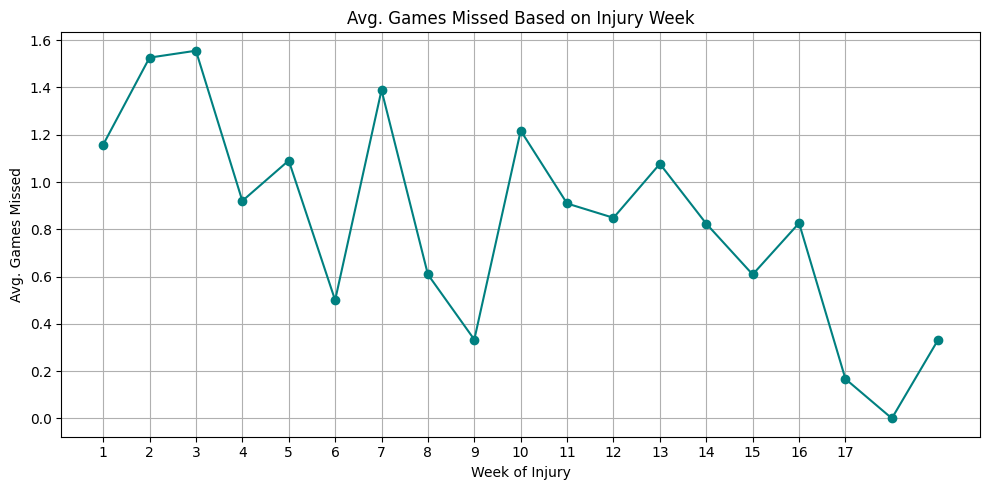

In [ ]:
seasonal = df.groupby('Week of Injury')['Games Missed'].mean()

plt.figure(figsize=(10,5))
seasonal.plot(marker='o', color='teal')
plt.title('Avg. Games Missed Based on Injury Week')
plt.xlabel('Week of Injury')
plt.ylabel('Avg. Games Missed')
plt.grid(True)
plt.xticks(range(1,18))
plt.tight_layout()
plt.show()


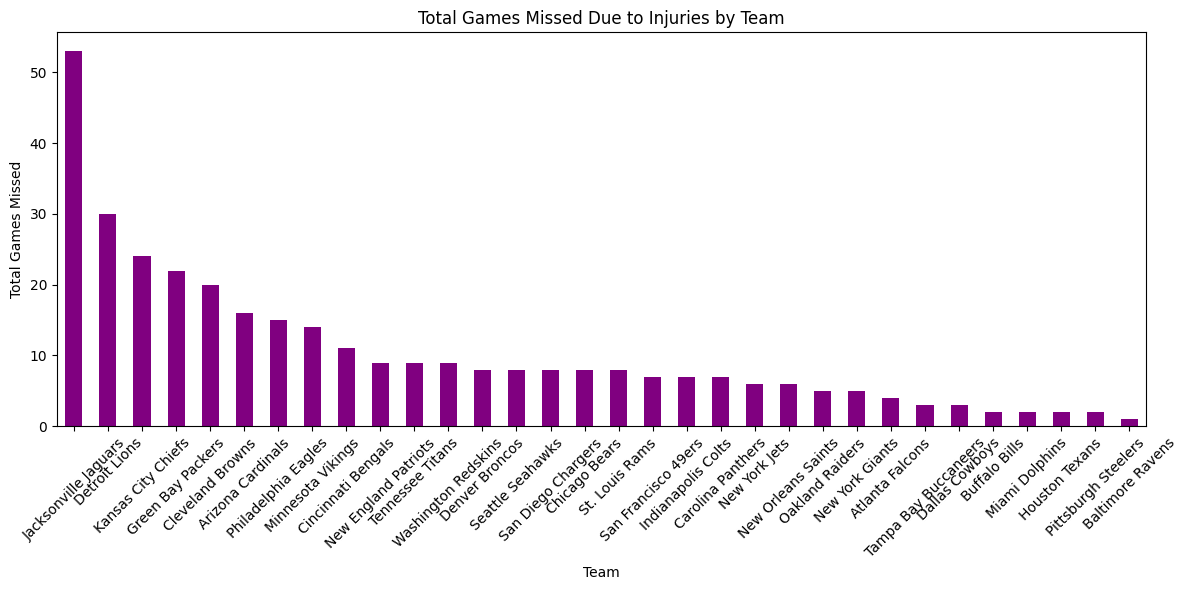

In [ ]:
team_injury_burden = df.groupby('Team')['Games Missed'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
team_injury_burden.plot(kind='bar', color='purple')
plt.title('Total Games Missed Due to Injuries by Team')
plt.ylabel('Total Games Missed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




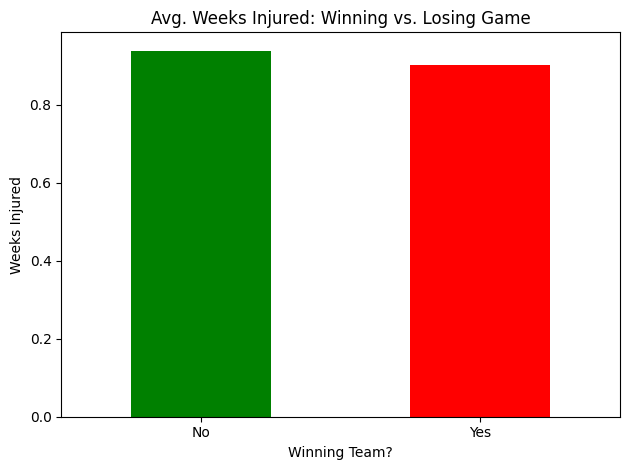

In [ ]:

valid_recovery = df[df['Winning Team?'].isin(['Yes','No'])]
win_comparison = valid_recovery.groupby('Winning Team?')['Weeks Injured'].mean()
win_comparison.plot(kind='bar', color=['green','red'], title='Avg. Weeks Injured: Winning vs. Losing Game')
plt.ylabel('Weeks Injured')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
unknown_rate = df['Unknown Injury?'].value_counts(normalize=True) * 100
print("Unknown Injury Reporting Rate:\n", unknown_rate)


Unknown Injury Reporting Rate:
 Unknown Injury?
No     98.72449
Yes     1.27551
Name: proportion, dtype: float64


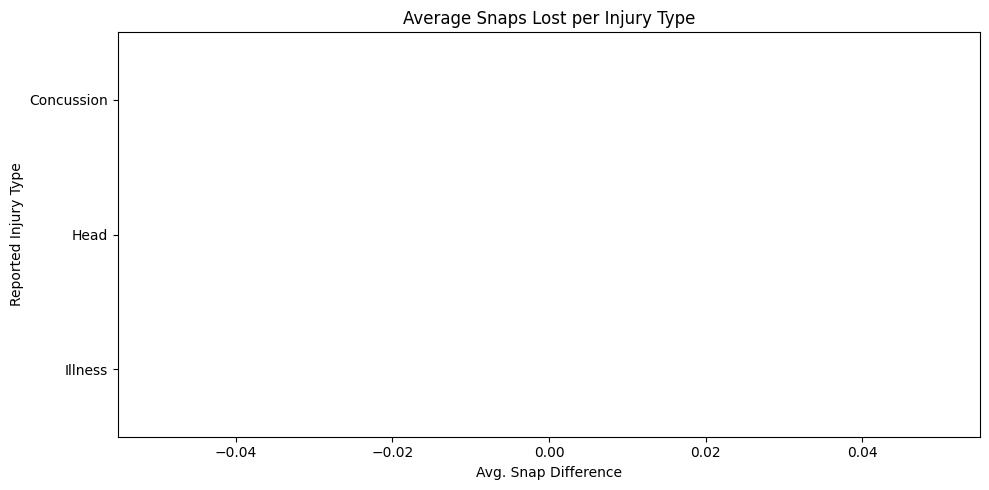

In [ ]:
df['Snaps Missed'] = df['Average Playtime Before Injury'] - df['Play Time After Injury']
snaps_lost = df.groupby('Reported Injury Type')['Snaps Missed'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
snaps_lost.plot(kind='barh', color='salmon')
plt.title('Average Snaps Lost per Injury Type')
plt.xlabel('Avg. Snap Difference')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


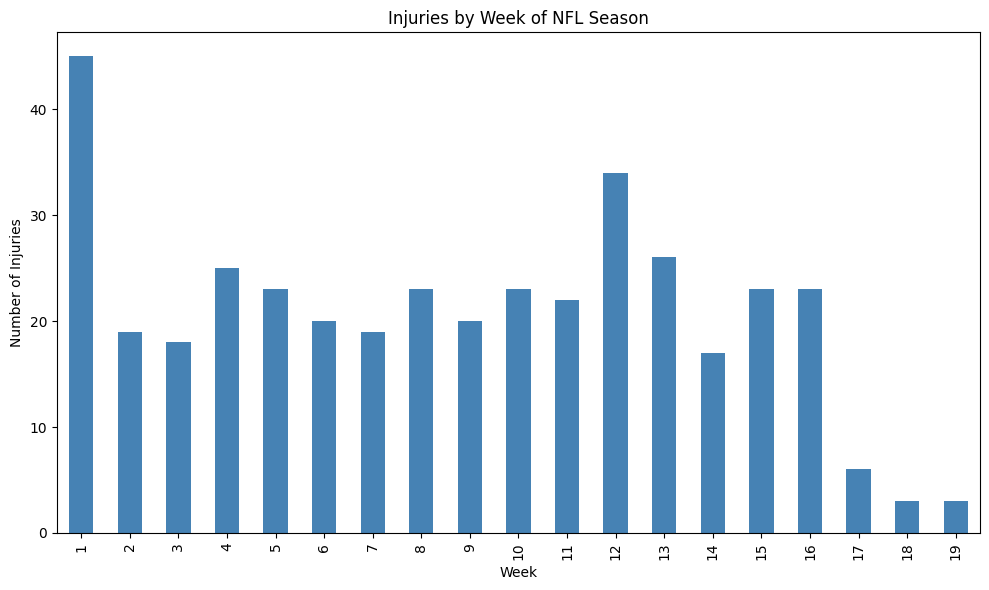

In [ ]:
weekly = df['Week of Injury'].value_counts().sort_index()

plt.figure(figsize=(10,6))
weekly.plot(kind='bar', color='steelblue')
plt.title('Injuries by Week of NFL Season')
plt.xlabel('Week')
plt.ylabel('Number of Injuries')
plt.tight_layout()
plt.show()
